In [1]:
import pandas as pd
import ast
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from week 13 in YY's Data Vis Class
# import spacy
# import wordcloud
# import en_core_web_sm
# # nlp = spacy.load('en')
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [8]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis


full_filename = "../data/by_article_fulltext_020920.jl"


full_df = imp.init_df(full_filename, "full", genre="none", categories="all")

def output_plot(outfile):
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(outfile, dpi=100)

full_df.head(2)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,advice,job_market,academic,postdoc,graduate,workplace_diversity,midcareer,non_disciplinary,life_and_career_balance,industry,career_profiles,government,undergraduate,working_life,early_career,career_related_policy,author,n_posts_author,column1,column2,one_time,category
0,5839,how to write a winning résumé,"[tooling up, advice, graduate, academic, industry, americas, united states]",peter fiske,1996-10-18,8:00 am,"bywelcome to ""tooling up,"" a monthly column about job hunting and career development for scienti...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",18,10,1996,yes,no,yes,no,yes,no,no,no,no,yes,no,no,no,no,no,no,peter fiske,59,no,yes,no,advice
1,5835,the commandments of cover letter creation,"[tooling up, advice, americas]",peter fiske,1996-12-20,0:00 am,"by've always hated the term ""cover letter."" it implies that the letter you send out to accompany...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",81,12,1996,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,peter fiske,59,no,yes,no,advice


In [4]:
categories = [
    "advice",
    "job market",
    "academic",
    "postdoc",
    "graduate",
    "workplace diversity",
    "midcareer",
    "non-disciplinary",
    "life and career balance",
    "industry",
    "career profiles",
    "government",
    "undergraduate",
    "working life",
    "early career",
    "career-related policy"
        ]
new_categories = []
for cat in categories:
    cat = cat.replace(" ", "_").replace("-", "_")
    new_categories.append(cat)
categories = new_categories

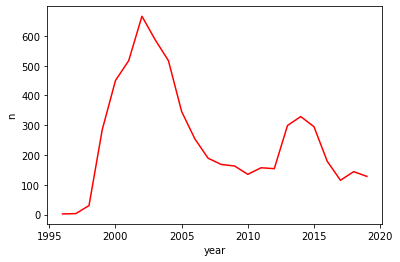

In [6]:
full_vis = vis.prep_per(full_df, group_by = "year", color = "red", test = False)

sns.lineplot(x = "year", y = "n", color = "red", data = full_vis)

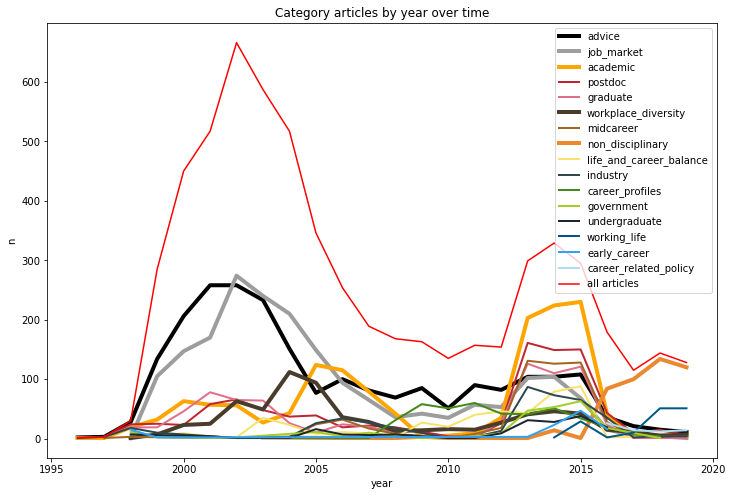

<Figure size 432x288 with 0 Axes>

In [12]:
# colors = ["black","green","orange","blue","purple","yellow","brown",]
colors = [
    "#000000",
    "#9D9D9D",
    "orange",
    "#BE2633",
    "#E06F8B",
    "#493C2B",
    "#A46422",
    "#EB8931",
    "#F7E26B",
    "#2F484E",
    "#44891A",
    "#A3CE27",
    "#1B2632",
    "#005784",
    "#31A2F2",
    "#B2DCEF"
]

bold_cats = [
    "advice",
    "job_market",
    "academic",
    "non_disciplinary",
    "workplace_diversity"
]

plots = []
count=0

plt.figure(figsize=(12, 8))
for cat in categories:
    if cat in bold_cats:
        boldness=4
    else:
        boldness=2
    cat_df = full_df[full_df[cat] == "yes"]
    cat_vis = vis.prep_per(cat_df, group_by = "year")
    sns.lineplot(x = "year", y = "n", color = colors[count], legend="full", label=cat, linewidth=boldness, data = cat_vis)
    count+=1

sns.lineplot(x = "year", y = "n", color = "red", legend="full", label="all articles",data = full_vis)
plt.title("Category articles by year over time")

output_plot("../figs/article_types_expanded.png")
# plt.savefig("../figs/article_types_expanded.png")

In [21]:
# Number of tags per post over time

n_tags = []

for i in range(len(full_df)):
    tags = full_df.iloc[i]["tags"]
    n_tags.append(len(tags))

full_df["n_tags"] = n_tags

full_df.head(3)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,advice,job_market,academic,postdoc,graduate,workplace_diversity,midcareer,non_disciplinary,life_and_career_balance,industry,career_profiles,government,undergraduate,working_life,early_career,career_related_policy,author,n_posts_author,column1,column2,one_time,category,n_tags
0,5839,how to write a winning résumé,"[tooling up, advice, graduate, academic, industry, americas, united states]",peter fiske,1996-10-18,8:00 am,"bywelcome to ""tooling up,"" a monthly column about job hunting and career development for scienti...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",18,10,1996,yes,no,yes,no,yes,no,no,no,no,yes,no,no,no,no,no,no,peter fiske,59,no,yes,no,advice,7
1,5835,the commandments of cover letter creation,"[tooling up, advice, americas]",peter fiske,1996-12-20,0:00 am,"by've always hated the term ""cover letter."" it implies that the letter you send out to accompany...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",81,12,1996,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,peter fiske,59,no,yes,no,advice,3
2,5840,dressing scientists for success: male case study,"[tooling up, advice, graduate, postdoc, academic, industry, americas]",peter fiske,1997-09-26,8:00 am,"bye all know that, with respect to fashion, the world holds a rather dim view of scientists like...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",361,21,1997,yes,no,yes,yes,yes,no,no,no,no,yes,no,no,no,no,no,no,peter fiske,59,no,yes,no,advice,7


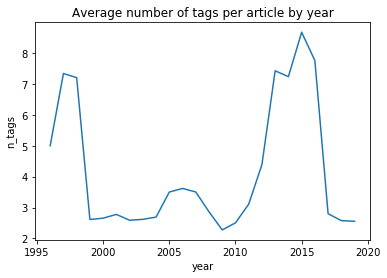

<Figure size 432x288 with 0 Axes>

In [26]:
tags_avg_df = full_df.groupby("year").mean()
tags_avg_df = tags_avg_df.reset_index()

sns.lineplot(x = "year", y = "n_tags", data = tags_avg_df)
plt.title("Average number of tags per article by year")

output_plot("../figs/average_tags_post.png")